In [1]:
# importing the requests library 
import requests 
import pandas as pd
from random import sample 
import matplotlib
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                                             
import sys
import scipy

In [2]:
funcList = [
            'terminase, small subunit',
            'terminase',
            'terminase, large subunit',
            'terminase, large subunit (ATPase domain)',
            'terminase, large subunit (nuclease domain)',
            'portal protein',
            'portal and MuF-like fusion protein',
            'scaffolding protein',
            'capsid maturation protease',
            'major capsid protein',
            'minor capsid protein',
            'MuF-like minor capsid protein',
            'capsid decoration protein, LamD-like',
            'capsid maturation protease and MuF-like fusion protein',
            'major capsid and protease fusion protein',
            'head fiber protein',
            'head-to-tail adaptor',
            'head-to-tail stopper',
            'tail terminator',
            'major tail protein',
            'tail assembly chaperone',
            'tape measure protein',
            'minor tail protein',
            'minor tail protein, D-ala-D-ala carboxypeptidase',
            'tail sheath protein',
            'tail fiber',
            'tailspike protein',
            'tail needle protein',
            'baseplate J protein',
            'tail tube protein',
            'baseplate wedge protein',
            'capsid decoration protein',
            'lysin A',
            'lysin A, protease M15 domain',
            'lysin A, protease C39 domain',
            'lysin A, glycosyl hydrolase domain',
            'lysin A, L-Ala-D-Glu peptidase domain',
            'lysin A, N-acetylmuramoyl-L-alanine amidase domain',
            'lysin A, protease domain',
            'lysin B',
            'endolysin',
            'holin',
            'serine integrase',
            'tyrosine integrase',
            'tyrosine homologous recombinase',
            'serine homologous recombinase',
            'ParA-like dsDNA partitioning protein',
            'ParB-like dsDNA partitioning protein',
            'ParB-like nuclease domain',
            'RepA-like replication initiator',
            'immunity repressor',
            'excise',
            'recombination directionality factor',
            'Cro (control of repressor’s operator)',
            'antirepressor',
            'DnaE-like DNA polymerase III (alpha)',
            'DNA polymerase I',
            'DNA polymerase III sliding clamp (Beta)',
            'DnaC-like helicase loader',
            'DNA helicase',
            'DnaB-like dsDNA helicase',
            'RepA-like helicase',
            'DNA primase',
            'DNA primase/helicase',
            'DNA primase/polymerase',
            'DNA primase/polymerase/helicase',
            'DnaQ-like (DNA polymerase III subunit)',
            'Nucleotidyl transferase',
            'polynucleotide kinase',
            'Lsr2-like DNA bridging protein',
            'RecA-like DNA recombinase',
            'RecB-like exonuclease/helicase',
            'Cas4 family exonuclease',
            'Ku-like dsDNA break-binding protein',
            'MRE11 double-strand break endo/exonuclease',
            'DprA-like DNA processing chain A',
            'RNA ligase',
            'rtcB-like RNA ligase',
            'DNA ligase',
            'RNaseE',
            'WhiB family transcription factor',
            'RNA polymerase sigma factor',
            'ASC-1 transciption coactivator',
            'ribonucleotide reductase',
            'SprT-like protease',
            'cysteine protease',
            'pyrimidine deaminase',
            'nucleoside deaminase',
            'deoxycytidylate deaminase',
            'nucleoside deoxyribosyltransferase',
            'ThyX-like thymidylate synthase',
            'thymidylate synthase',
            'lipoyl synthase',
            'dihydrofolate reductase',
            'MazG-like nucleotide pyrophosphohydrolase',
            'phosphoribosyl pyrophosphate transferase',
            'MutT-like nucleotide pyrophosphohydrolase',
            'glycoside hydrolase',
            'peptidyl tRNA hydrolase',
            'DNA methylase',
            '5\' nucleotidase',
            'acetyltransferase',
            'methyltransferase',
            'O-methyltransferase',
            'tRNA-methyltransferase',
            'exonuclease',
            'helix-turn-helix DNA binding domain, MerR-like',
            'ribbon-helix-helix DNA binding domain',
            'helix-turn-helix DNA binding domain',
            'RuvC-like resolvase',
            'RusA-like resolvase (endonuclease)',
            "exonuclease",
            "RecE-like exonuclease",
            "RecT-like ss DNA binding protein",
            "ssDNA binding protein, ERF family",
            "glycosylase",
            "glycosyltransferase",
            "n-acetylglucosaminyltransferase",
            "galactosyltransferase",
            "hydrolase",
            "peptidase",
            "nicotinate ribosyltransferase",
            'PnuC-like Nicotinamide riboside transporter',
            'adenylyltransferase',
            'ClpP-like protease',
            'thioredoxin',
            'NrdH-like glutaredoxin',
            'NrdI-like flavodoxin',
            'glutaredoxin',
            'HNH endonuclease',
            'G-I-Y Y-I-G endonuclease',
            'LAGLIDADG endonuclease',
            'endonuclease VII',
            'transposase',
            'mycobacteriophage mobile element 1 (MPME 1)',
            'mycobacteriophage mobile element 2 (MPME 2)',
            'lipase, LipC-like',
            'esterase',
            'thioesterase',
            'carboxylesterase',
            'lipoprotein',
            'phosphoesterase',
            'metallophosphoesterase',
            'Metalloprotease',
            'phosphatase',
            'AAA-ATPase',
            'ATP binding cassete-like protein',
            'serine/threonine kinase',
            'adenylate kinase',
            'ppGpp synthesis/degradation protein, SpoT-like',
            'queosine biosynthesis protein, QueC-like',
            'queosine biosynthesis protein, QueD-like',
            'queosine biosynthesis protein, QueE-like',
            'queuine tRNA-ribosyltransferase',
            'GTP cyclohydrolase I',
            'RF-1 peptide chain release factor',
            'Ro-like RNA binding protein',
            'RNA binding protein',
            'membrane protein, Band-7 –like',
            'adenylosuccinate synthetase, PurA-like',
            'adenylosuccinate lyase, PurB-like',
            'histidine triad nucleotide binding protein',
            'pentapeptide repeat protein',
            'dsDNA break-binding protein, AddA-like',
            'FtsK-like DNA translocase',
            'LysM-like peptidoglycan binding protein',
            'CobT-like cobalamin biosynthesis protein',
            'toxin, VIP2-like',
            'VIP2-like ADP-ribosyltransferase toxin',
            'protease',
            'tRNA nucleotidyltransferase',
            'chaperonin, DnaJ-like',
            'adenylate kinase',
            'PTPc tyrosine phosphatase',
            'antirestriction protein, ArdA-like',
            'antirestriction protein, OCR-like',
            'aminotransferase',
            'deoxyuridine triphosphatase',
            'ADP-ribosyltransferase',
            'ADP-ribosyltransferase domain and MuF-like fusion proein',
            'ADP-ribosyl glycohydrolase',
            'antitoxin, VbhA-like',
            'antitoxin in toxin/antitoxin system, RelB-like',
            'toxin in toxin/antitoxin system, RelE-like',
            'toxin in toxin/antitoxin system, BrnT-like',
            'antitoxin in toxin/antitoxin system, HicB-like',
            'toxin in toxin/antitoxin system, HicA-like',
            'RexA family abortive infection protein',
            'RexA family abortive infection protein',
            'PAPS reductase-like domain',
            'purple acid phosphatase',
            'thymidylate kinase',
            'transposase',
            'deoxynucleoside monophosphate kinase',
            'phosphoribosyl transferase',
            'membrane protein',
            'glutamine amidotransferase domain',
            'carboxylate amine ligase',
            'DNA binding, HU-like domain',
            'UDP-glucose dehydrogenase',
            'arsenate reductase',
            'FabG-like reductase',
            'oxidoreductase',
            'phage membrane DNA delivery',
            'tellurium resistance protein D family',
            'helicase',
            'DNA polymerase',
            'nuclease',
            'methylase',
            'hydrolase',
            'protease',
            'Holliday junction resolvase',
            'nucleotide pyrophosphohydrolase',
            'kinase',
            'integrase',
            'dna binding protein',
            'ssdna binding protein',
            'esterase/lipase',
            'hnh domain protein'
    
           ]

funcList = [i.lower().replace(',','') for i in funcList]

In [3]:
df_genes = pd.read_csv("all_phage_genes.csv")
df_genes = df_genes.applymap(str)
df_genes["GeneNumber"] = df_genes["GeneNumber"].apply(pd.to_numeric)
df_genes.head()

,GeneID,HostStrain,Cluster,Pham,Function,Translation,Orientation,PhageName,GeneNumber
0,20ES_CDS_1,Mycobacterium,A2,36676,nan,MYGTRSSAFWASQPGKFDVLNLRMTFPSTSAHEIPDLTATDFVPEN...,F,20ES,1
1,20ES_CDS_10,Mycobacterium,A2,34452,lysin B,MSLQVGSSGELVNRWIRVMKARFASYAGKLKEDGYFGLDDKAVQQE...,F,20ES,10
2,20ES_CDS_11,Mycobacterium,A2,34196,terminase,MSLENHHPELAPSPPHIIGPSWQRTVDGSWHLPDPKMTLGWGVLKW...,F,20ES,11
3,20ES_CDS_12,Mycobacterium,A2,37970,portal protein,MTAPLPGQEEIPDPAIARDEMISAFDDAVKNLKINTSYYEAERRPE...,F,20ES,12
4,20ES_CDS_13,Mycobacterium,A2,21454,capsid maturation protease,MITAAVAAYVQRFASMFTGPALSLGEWARFLQTLFPEVQRRYAQAA...,F,20ES,13


In [4]:
G_original = nx.read_gml("bipartite_pham_func.gml")

In [5]:
function_count = 0
pham_count = 0
G = G_original.copy()
for i in G.nodes():
    if G.nodes[i]["group"] == "function":
        function_count += 1
    else:
        pham_count += 1
        
print("Pham count from Network:", pham_count, "--- Actual Count from df:",df_genes["Pham"].nunique())
print("Function count from Network:", function_count, "--- Actual Count from df:",df_genes["Function"].nunique())


n = G.number_of_nodes()#function for number of nodes
m = G.size() #function for number of edges
kmean = m*2/n #mean of in directed degree is edges/number of nodes

print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)

kmean_function = m/function_count
kmean_pham = m/pham_count
print(f'mean degree for function,    <k> = %5.2f' % kmean_function)
print(f'mean degree for pham   <k> = %5.2f' % kmean_pham)

Pham count from Network: 23208 --- Actual Count from df: 23208
Function count from Network: 1788 --- Actual Count from df: 1788
number of nodes, n  = 24996
number of edges, m  = 30119
mean degree,    <k> =  2.41
mean degree for function,    <k> = 16.85
mean degree for pham   <k> =  1.30


In [10]:
edge_cut_prop = np.linspace(0.01, 1, num=30)
true_ratio = []
false_ratio = []
true_count = []
false_count = []
total_count = []
connected_components = []
mean_pham_degree = []
mean_function_degree = []

for prop in edge_cut_prop:
    true = 0
    false = 0
    count = 0
    removed_edges = []
    G = G_original.copy()
    for i, j in G.edges():
        func = i if G.nodes[i]["group"] == "function" else j
        pham = i if G.nodes[i]["group"] == "pham" else j
        num_pham_members = G.nodes[pham]["freq"]
        if G.edges[i,j]["weight"]/num_pham_members <= prop:
            # record counts
            if func.lower() in funcList:
                true += 1
            else:
                false += 1
            count += 1
            removed_edges.append([i,j])
            
        elif G.edges[i,j]["weight"]/num_pham_members > 1:
            print(i,j)
    
    # snip edge
    for pair in removed_edges:
        i = pair[0]
        j = pair[1]
        G.nodes[i]["freq"] -= G.edges[i,j]["weight"]
        G.nodes[j]["freq"] -= G.edges[i,j]["weight"]
        G.remove_edge(i, j)
    
    m = G.size() #function for number of edges
    kmean_function = m/function_count
    kmean_pham = m/pham_count
    
    
    mean_pham_degree += [kmean_pham]
    mean_function_degree += [kmean_function]
    connected_components += [nx.number_connected_components(G)]
    
    true_ratio += [true/count]
    false_ratio += [false/count]
    true_count += [true]
    false_count += [false]
    total_count += [count]

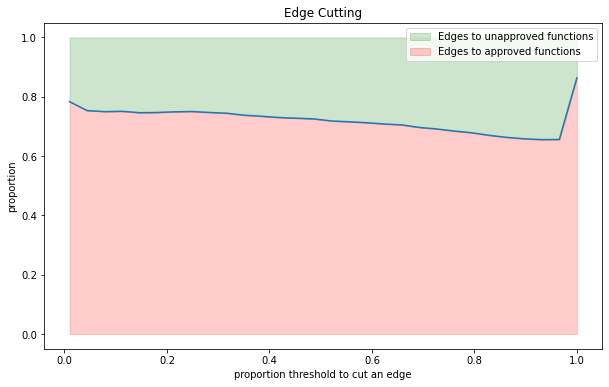

In [12]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(edge_cut_prop, false_ratio)

plt.fill_between(edge_cut_prop, false_ratio, [1]*len(edge_cut_prop),
                 facecolor="green", # The fill color
                 color='green',       # The outline color
                 alpha=0.2,          # Transparency of the fill
                 label = "Edges to unapproved functions")

plt.fill_between(edge_cut_prop, [0]*len(edge_cut_prop), false_ratio,
                 facecolor="red", # The fill color
                 color='red',       # The outline color
                 alpha=0.2,          # Transparency of the fill
                 label = "Edges to approved functions")


plt.ylabel("proportion")
plt.xlabel("proportion threshold to cut an edge")
plt.legend()


plt.title("Edge Cutting")
plt.show()

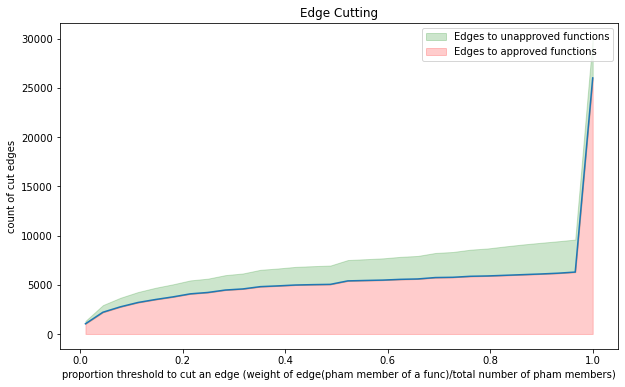

In [13]:
fig, ax = plt.subplots(figsize = (10,6))

plt.plot(edge_cut_prop, false_count)

plt.fill_between(edge_cut_prop, false_count, total_count,
                 facecolor="green", # The fill color
                 color='green',       # The outline color
                 alpha=0.2,          # Transparency of the fill
                 label = "Edges to unapproved functions")

plt.fill_between(edge_cut_prop, [0]*len(edge_cut_prop), false_count,
                 facecolor="red", # The fill color
                 color='red',       # The outline color
                 alpha=0.2,          # Transparency of the fill
                 label = "Edges to approved functions")


plt.ylabel("count of cut edges")
plt.xlabel("proportion threshold to cut an edge (weight of edge(pham member of a func)/total number of pham members)")
plt.legend()

plt.title("Edge Cutting")
plt.show()

Goal is to get the mean degree of phams equal to 1

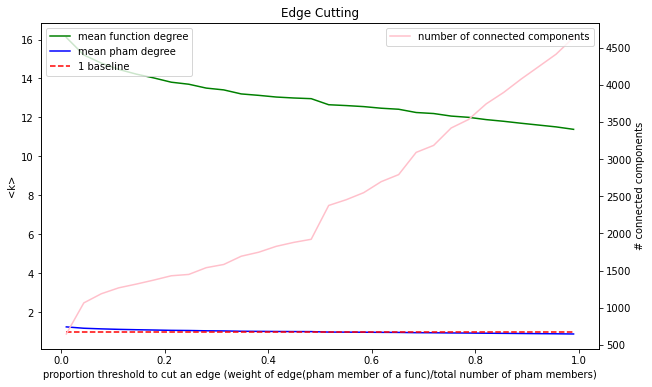

In [9]:
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(edge_cut_prop, mean_function_degree, label = "mean function degree", color="green")
ax1.plot(edge_cut_prop, mean_pham_degree, label = "mean pham degree", color="blue")
ax1.plot(edge_cut_prop, [1]*len(mean_pham_degree), label = "1 baseline", color="red", linestyle="--")

ax1.set_ylabel("<k>")
ax1.set_xlabel("proportion threshold to cut an edge (weight of edge(pham member of a func)/total number of pham members)")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()

ax2.plot(edge_cut_prop, connected_components, label = "number of connected components", color="pink")
ax2.set_ylabel("# connected components")
ax2.legend(loc="upper right")

plt.title("Edge Cutting")
plt.show()